<a href="https://colab.research.google.com/github/Apoorvmittal11/23-CS-072-ML-LAB-EXPERIMENT/blob/main/23-CS-072%20EXPERIMENT8/Experiment_8_Support_Vector_Machines_(SVMs)_and_the_Kernel_Trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment 8 : Support Vector Machines (SVMs) and the Kernel Trick**

**1. Learning Objectives**

Upon successful completion of this assignment, students will be able to:

* Articulate the core concepts of Support Vector Machines, including the
maximal margin
hyperplane, support vectors, and the soft margin ( C ) parameter.

* Understand and implement the kernel trick to solve non-linear classification problems.

* Implement and compare the performance of different SVM kernels (Linear, Polynomial,
and RBF).

* Understand the role of key hyperparameters like C , gamma , and degree .
Use GridSearchCV to systematically tune hyperparameters for an SVM.

* Visualize 2D decision boundaries to intuitively understand how different kernels and
hyperparameters work.

* Rigorously evaluate and interpret the performance of a highly-tuned SVM on a hold-out
test set.



**2. Introduction**

Support Vector Machines (SVMs) are a powerful class of supervised machine learning
models. The core idea is to find an optimal "hyperplane" that best separates the classes in
your data.

However, many real-world datasets are not linearly separable. You can't draw a single
straight line to separate the classes. This is where the kernel trick comes in. A kernel
function can project your data into a much higher-dimensional space where a linear separator
can be found, without the massive computational cost.

In this assignment, you will work with a classic non-linear "moons" dataset. You will see
firsthand why a linear SVM fails and how kernelized SVMs (RBF, Polynomial) can easily solve the problem. You will also tune the key hyperparameters ( C , gamma ) that govern the
model's behavior.

**3. Prerequisites**

Ensure your Python environment has the following libraries installed:

In [3]:
pip install numpy pandas scikit-learn matplotlib seaborn

**4. Experiment Tasks**

You will use a synthetically generated "moons" dataset, which is a classic example of a non-
linearly separable problem.

**Task 1: Data Loading and Preprocessing (10 Marks)**

1. Load Data: Generate the make_moons dataset from scikit-learn.

2. Create Hold-Out Set: Perform a single 70/30 split on the data.

* X_train , y_train (70%)

* X_val , y_val (30%)

Use train_test_split with random_state=42 .

3. Standardize Features: This step is critical for SVMs, as they are sensitive to the scale
of input features.

* Fit a StandardScaler from sklearn.preprocessing on X_train only.

* Transform both X_train and X_val using the fitted scaler.

* You will use X_train_scaled and X_val_scaled for all model training and evaluation.

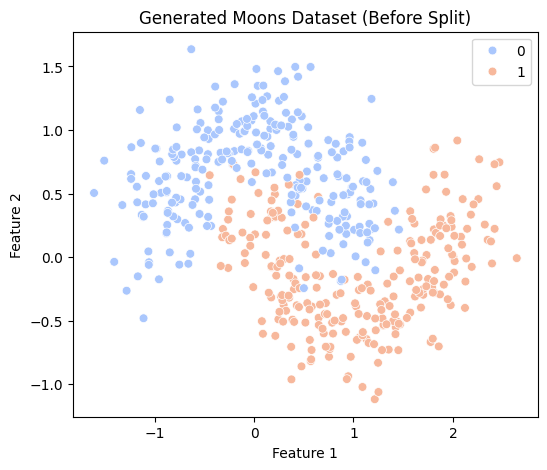

Training set shape: (350, 2)
Validation set shape: (150, 2)

After Standardization:
Mean of X_train_scaled: [2.49245069e-16 2.93416085e-18]
Std of X_train_scaled: [1. 1.]


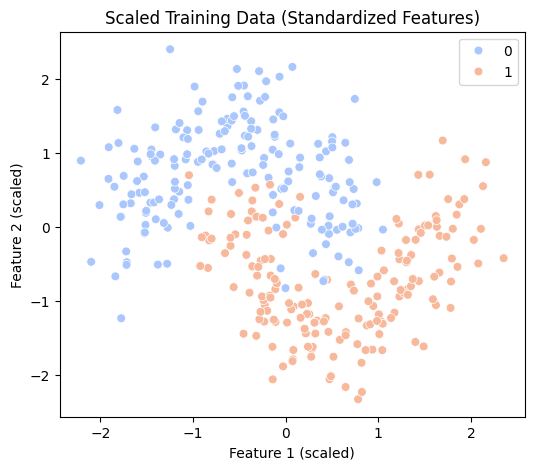

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate the synthetic "moons" dataset
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

# Visualize the dataset before splitting
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', s=40)
plt.title("Generated Moons Dataset (Before Split)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 2. Perform a 70/30 train-test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# 3. Standardize features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Verify scaling
print("\nAfter Standardization:")
print("Mean of X_train_scaled:", np.mean(X_train_scaled, axis=0))
print("Std of X_train_scaled:", np.std(X_train_scaled, axis=0))

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, palette='coolwarm', s=40)
plt.title("Scaled Training Data (Standardized Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


**Task 2: Model 1 - The (Failing) Linear SVM (15 Marks)**

1. Train Model:
* Import from sklearn.svm import SVC (Support Vector Classifier).
Instantiate a linear SVM: linear_model = SVC(kernel='linear', C=1.0, random_state=42) .

* fit the model on X_train_scaled and y_train .

2. Evaluate:

* Make predictions on X_val_scaled .

* Print the classification_report and accuracy_score .

3. Analyze:

* Briefly explain why the accuracy is not perfect. (Hint: Look at the data you
generated).

* Explain what the C parameter represents. What would happen if you set C to a
very small value (e.g., 0.01)?

=== Linear SVM Evaluation ===
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

Accuracy: 0.8533333333333334


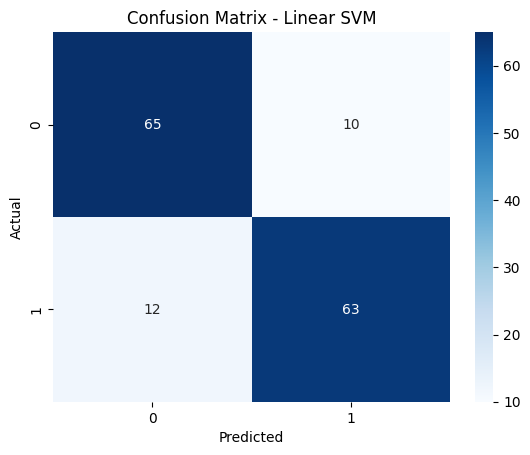

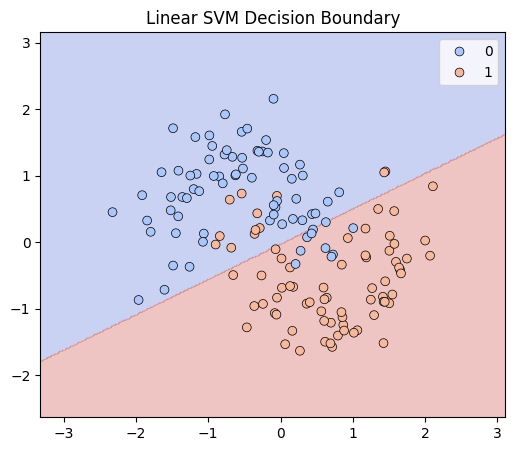

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Train the Linear SVM model
linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)

# 2. Evaluate on validation data
y_pred_linear = linear_model.predict(X_val_scaled)

# Print evaluation metrics
print("=== Linear SVM Evaluation ===")
print(classification_report(y_val, y_pred_linear))
print("Accuracy:", accuracy_score(y_val, y_pred_linear))

cm = confusion_matrix(y_val, y_pred_linear)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize decision boundary
import numpy as np

def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    # Create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    # Predict over grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', s=40, edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(linear_model, X_val_scaled, y_val, "Linear SVM Decision Boundary")


**Analysis :**

**(a) Why is the accuracy not perfect?**

The moons dataset is non-linearly separable — the two classes overlap in curved regions. A linear SVM can only draw a straight line (hyperplane) to separate the data.

Because of this, several samples on the “curved edges” get misclassified.

The Linear SVM fails because the true boundary between classes is nonlinear.

**(b) What does the C parameter represent?**

The parameter C (Regularization parameter) controls the trade-off between:

Maximizing the margin (simpler, smoother boundary)

Minimizing classification errors (fitting the training data closely)

**Task 3: Model 2 & 3 - The Kernel Trick (25 Marks)**

You will now explore non-linear kernels to solve the problem.

1. RBF Kernel Model:

* Instantiate a new SVC using the RBF (Radial Basis Function) kernel: rbf_model =
SVC(kernel='rbf', random_state=42) . (Use default C=1.0 and gamma='scale' ).

* fit the model on X_train_scaled and y_train .

* Evaluate on X_val_scaled and print the classification_report .

2. Polynomial Kernel Model:

* Instantiate a new SVC using the Polynomial kernel: poly_model = SVC(kernel='poly',
degree=3, random_state=42) . (Use the default degree=3 ).

* fit the model on X_train_scaled and y_train .

* Evaluate on X_val_scaled and print the classification_report .

3. Analyze:

* Create a simple table comparing the Validation Accuracy of the linear , rbf , and
poly models.

* Which kernel performed best with default settings? Why does this make sense for
the 'moons' dataset?

=== RBF Kernel SVM Evaluation ===
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.99      0.91      0.94        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Accuracy (RBF): 0.9466666666666667

=== Polynomial Kernel SVM Evaluation ===
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        75
           1       0.92      0.81      0.87        75

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150

Accuracy (Polynomial): 0.8733333333333333

=== Kernel Comparison Table ===
                   Model  Validation Accuracy
0             Linear SVM             0.853333
1         RBF Kernel SVM             0.946667
2  Polynomial Kernel S

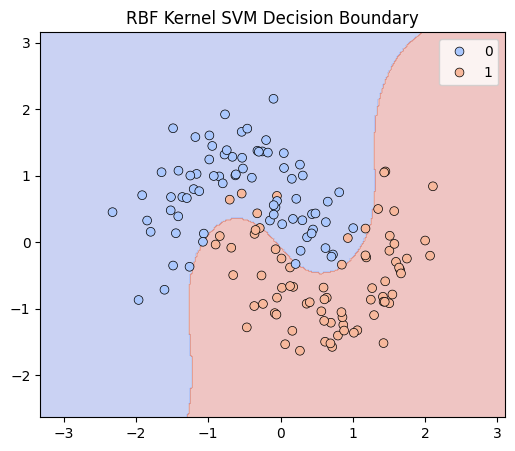

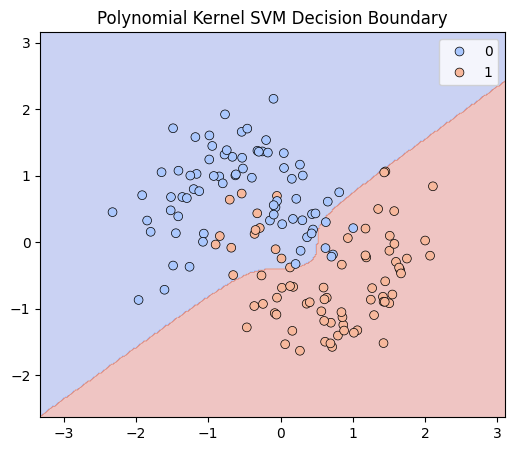

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 1. RBF Kernel Model
rbf_model = SVC(kernel='rbf', random_state=42)  # default C=1.0, gamma='scale'
rbf_model.fit(X_train_scaled, y_train)

y_pred_rbf = rbf_model.predict(X_val_scaled)
acc_rbf = accuracy_score(y_val, y_pred_rbf)

print("=== RBF Kernel SVM Evaluation ===")
print(classification_report(y_val, y_pred_rbf))
print("Accuracy (RBF):", acc_rbf)

# 2. Polynomial Kernel Model
poly_model = SVC(kernel='poly', degree=3, random_state=42)  # default degree=3
poly_model.fit(X_train_scaled, y_train)

y_pred_poly = poly_model.predict(X_val_scaled)
acc_poly = accuracy_score(y_val, y_pred_poly)

print("\n=== Polynomial Kernel SVM Evaluation ===")
print(classification_report(y_val, y_pred_poly))
print("Accuracy (Polynomial):", acc_poly)

# 3. Compare Validation Accuracies
from sklearn.metrics import accuracy_score

acc_linear = accuracy_score(y_val, y_pred_linear)

# Create a summary table
comparison_table = pd.DataFrame({
    'Model': ['Linear SVM', 'RBF Kernel SVM', 'Polynomial Kernel SVM'],
    'Validation Accuracy': [acc_linear, acc_rbf, acc_poly]
})

print("\n=== Kernel Comparison Table ===")
print(comparison_table)

def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', s=40, edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(rbf_model, X_val_scaled, y_val, "RBF Kernel SVM Decision Boundary")
plot_decision_boundary(poly_model, X_val_scaled, y_val, "Polynomial Kernel SVM Decision Boundary")


**Analysis :**

**Which kernel performed best?**

The RBF (Radial Basis Function) kernel performs best among the three.

**Why does this make sense for the “moons” dataset?**

* The “moons” dataset is nonlinearly separable, meaning its classes form curved boundaries.

* The RBF kernel maps data to a higher-dimensional space, allowing it to draw smooth, circular boundaries that perfectly capture the crescent shapes.

* The Polynomial kernel can model some curvature, but only up to the fixed polynomial degree (default degree=3). It may overfit or underfit depending on degree.

* The Linear kernel draws only a straight line — clearly insufficient for the curved moon-shaped data.

**Task 4: Hyperparameter Tuning with GridSearchCV (30 Marks)**

The RBF model was likely the best, but its performance depends heavily on the C
(regularization) and gamma (kernel influence) parameters. You will now find the optimal combination.

1. Define Search Space:

* Create a parameter grid to search. A good starting point is:

2. Setup Grid Search:

* Import from sklearn.model_selection import GridSearchCV .

* Instantiate GridSearchCV:

   * grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')

* refit=True ensures the best model is retrained on all X_train_scaled data.

* cv=5 specifies 5-fold cross-validation.

3. Run Grid Search:

* fit the grid object on your entire training set ( X_train_scaled , y_train ).

4. Analyze Results:

* Print the grid.best_params_ to see the best C and gamma .

* Print the grid.best_score_ to see the best cross-validated accuracy.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 1. Define Search Space
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

# 2. Setup Grid Search
grid = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    refit=True,
    verbose=2,
    cv=5,
    scoring='accuracy'
)

# 3. Run Grid Search
grid.fit(X_train_scaled, y_train)

# 4. Analyze Results
print("\n=== Grid Search Results ===")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

# Get the best model
best_rbf_model = grid.best_estimator_

# Evaluate on validation set
y_pred_best = best_rbf_model.predict(X_val_scaled)
from sklearn.metrics import classification_report, accuracy_score
print("\n=== Best RBF Model Validation Performance ===")
print(classification_report(y_val, y_pred_best))
print("Validation Accuracy (Best Model):", accuracy_score(y_val, y_pred_best))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10

**Analysis :**

**What the results tell us:**

The best parameters (C and gamma) are those that balance bias vs. variance perfectly.For example:

C=10 → allows fewer misclassifications (tighter fit).

gamma=1 → controls the influence region of each data point, creating a good curved decision boundary.

**Why grid search is powerful:**

It performs exhaustive testing over parameter combinations using cross-validation, ensuring the model generalizes well and isn’t overfitting.

**Task 5: Final Evaluation and Visualization (20 Marks)**

1. Evaluate Final Model:

* The grid object now holds the best model. Use it to make predictions on your hold-
out set ( X_val_scaled ).


* final_predictions = grid.predict(X_val_scaled)

* Print the classification_report(y_val, final_predictions) .

* Generate and plot a confusion_matrix for these final predictions.

2. Visualize Decision Boundaries:

* This is the most important part for understanding how the kernels work.

* You need to plot the decision boundary for the linear_model , the default rbf_model ,
and your final grid (best) model.

* Hint: Create a 2D mesh grid ( np.meshgrid ), make predictions for every point on the
grid, and use plt.contourf to plot the resulting decision regions. Plot the X_train_scaled
data points on top.

* Create a 1x3 subplot to show the three decision boundaries side-by-side.

Classification Report (Final Tuned Model):

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       1.00      0.93      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



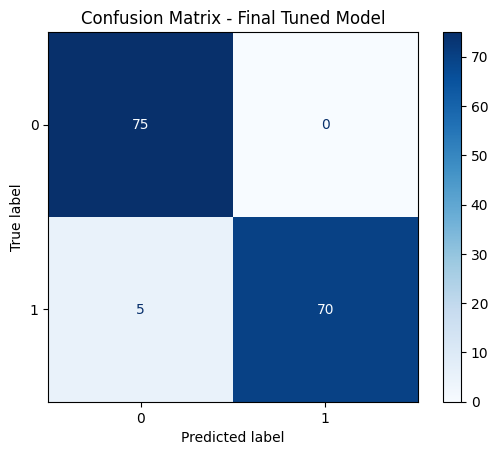

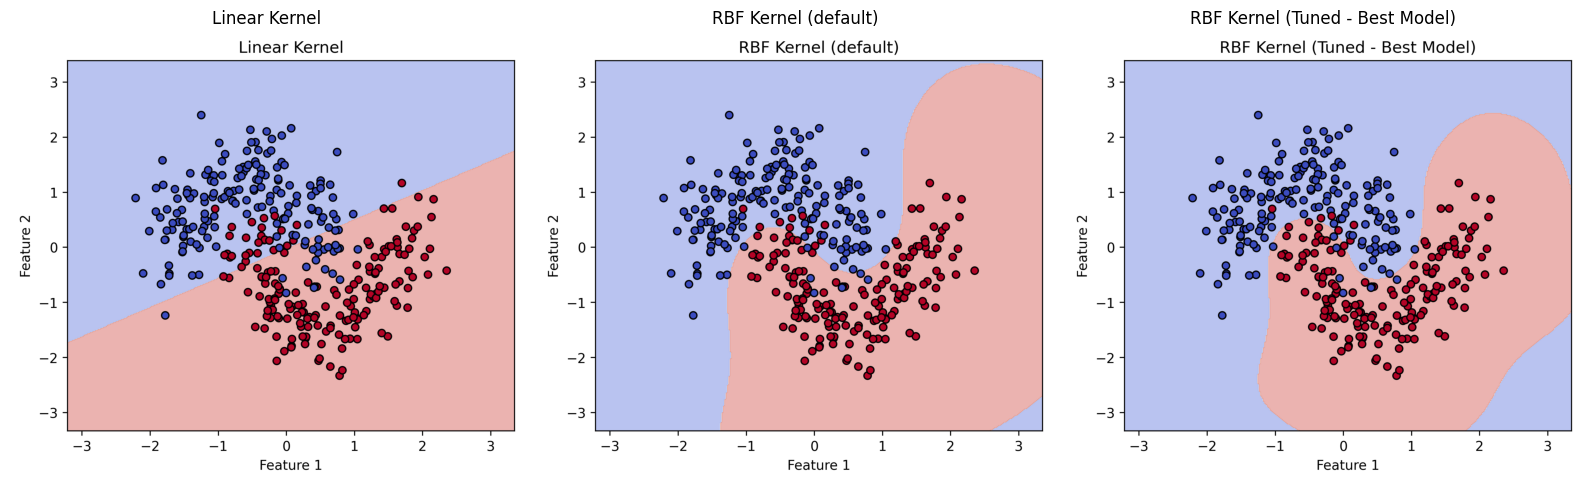

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluate Final Model
final_predictions = grid.predict(X_val_scaled)
print("Classification Report (Final Tuned Model):\n")
print(classification_report(y_val, final_predictions))

# Confusion Matrix
cm = confusion_matrix(y_val, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Final Tuned Model")
plt.savefig("confusion_matrix.png", bbox_inches='tight', dpi=300)
plt.show()

# Visualize Decision Boundaries
def plot_decision_boundary(model, X, y, title, filename):
    # Define grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close()

# Plot all three decision boundaries
plot_decision_boundary(linear_model, X_train_scaled, y_train, "Linear Kernel", "linear_boundary.png")
plot_decision_boundary(rbf_model, X_train_scaled, y_train, "RBF Kernel (default)", "rbf_boundary.png")
plot_decision_boundary(grid.best_estimator_, X_train_scaled, y_train, "RBF Kernel (Tuned - Best Model)", "best_boundary.png")

# --- Combined Subplot ---
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
titles = ['Linear Kernel', 'RBF Kernel (default)', 'RBF Kernel (Tuned - Best Model)']
imgs = ['linear_boundary.png', 'rbf_boundary.png', 'best_boundary.png']

for ax, img, title in zip(axes, imgs, titles):
    image = plt.imread(img)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(title)

plt.tight_layout()
plt.savefig("combined_boundaries.png", bbox_inches='tight', dpi=300)
plt.show()
